In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as pln
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
pd.options.display.max_columns = None

In [3]:
movies = pd.read_csv(
    '/home/duoan/work/input/tmdb/tmdb-movies.csv',
    index_col='id',
    parse_dates=['release_date'])

In [4]:
movies.head(5)

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


## 数据校验

In [5]:
movies.shape

(10866, 20)

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_ad

In [7]:
movies.isna().sum()

imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
movies.isna().sum(axis=1)

id
135397    0
76341     0
262500    0
140607    0
168259    0
281957    0
87101     0
286217    0
211672    0
150540    0
206647    0
76757     0
264660    0
257344    0
99861     0
273248    0
260346    0
102899    0
150689    1
131634    0
158852    0
307081    1
254128    0
216015    0
318846    0
177677    0
214756    1
207703    0
314365    0
294254    0
         ..
38720     1
19728     1
22383     1
13353     1
34388     2
42701     1
36540     4
29710     1
23728     1
5065      1
17102     1
28763     1
2161      1
28270     1
26268     1
15347     1
37301     1
15598     2
31602     1
13343     1
20277     1
5921      1
31918     1
20620     2
5060      1
21        2
20379     1
39768     2
21449     1
22293     1
Length: 10866, dtype: int64

# 每年最受欢迎的电影类别是哪些？票房高的电影有哪些特点？

## 单变量分析

In [9]:
movies.popularity.describe(percentiles=[.3, .5, .98])

count    10866.000000
mean         0.646441
std          1.000185
min          0.000065
30%          0.239465
50%          0.383856
98%          3.203822
max         32.985763
Name: popularity, dtype: float64

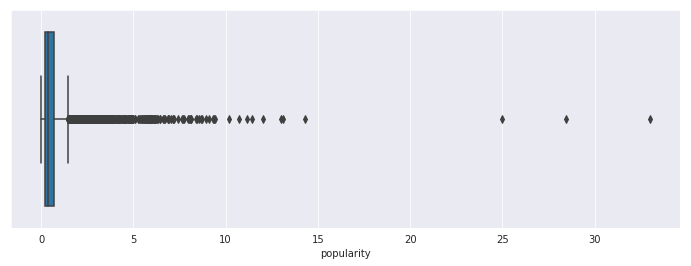

In [10]:
plt.figure(figsize=(12,4))
_ = sns.boxplot(movies.popularity)

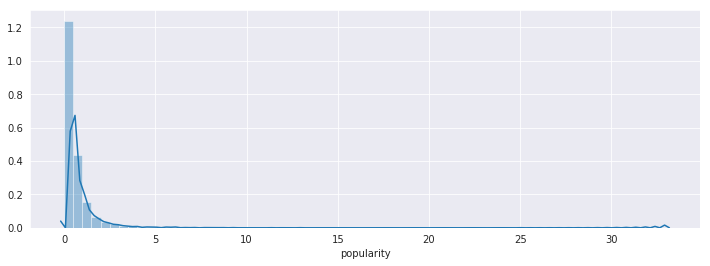

In [11]:
plt.figure(figsize=(12,4))
_ = sns.distplot(movies.popularity, bins=66)

In [12]:
pop_movies = movies[movies.popularity>1.350653]

In [13]:
len(pop_movies)

1087

In [14]:
stats_yearly_popularity = movies.groupby('release_year')['popularity'].describe(percentiles=[.3, .5, .98])
stats_yearly_popularity

,count,mean,std,min,30%,50%,98%,max
release_year,,,,,,,,
1960,32.0,0.458932,0.541833,0.055821,0.204029,0.268273,2.152659,2.610362
1961,31.0,0.422827,0.526517,0.027527,0.196467,0.265092,2.104011,2.631987
1962,32.0,0.454783,0.555945,0.038819,0.220850,0.299075,1.929483,3.170651
1963,34.0,0.502706,0.551040,0.045417,0.197741,0.249940,2.291870,2.508235
1964,42.0,0.412428,0.620196,0.008990,0.154576,0.194472,2.380272,3.153791
1965,35.0,0.342587,0.400366,0.004770,0.147155,0.201703,1.504648,1.910465
1966,46.0,0.304112,0.239278,0.034555,0.157719,0.245917,0.959212,1.227582
1967,40.0,0.471154,0.593532,0.034181,0.159539,0.240558,2.298394,2.550704
1968,39.0,0.484202,0.552789,0.005265,0.190508,0.323826,1.670439,3.309196


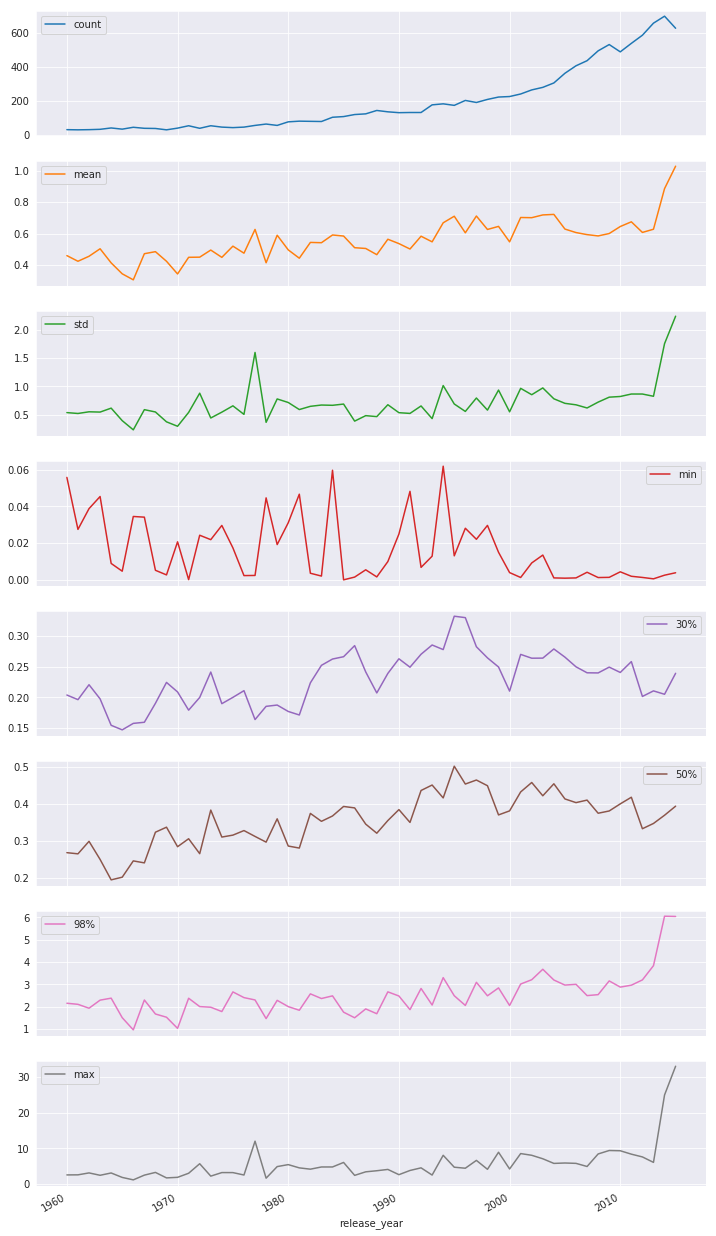

In [15]:
axes = stats_yearly_popularity.plot.line(subplots=True, figsize=(12,24))

In [16]:
movies.popularity.map(lambda x: int(x)).value_counts().sort_index()

0     9110
1     1189
2      311
3      119
4       52
5       31
6       20
7        9
8       10
9        4
10       2
11       2
12       2
13       1
14       1
24       1
28       1
32       1
Name: popularity, dtype: int64

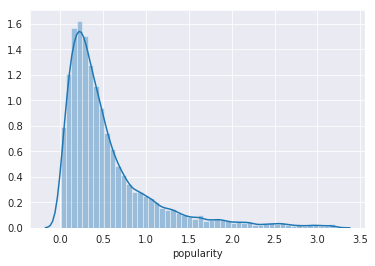

In [18]:
_ = sns.distplot(movies[movies['popularity']<3.203822].popularity, bins=50)

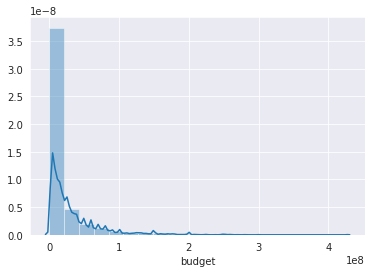

In [19]:
_ = sns.distplot(movies.budget, bins=20)

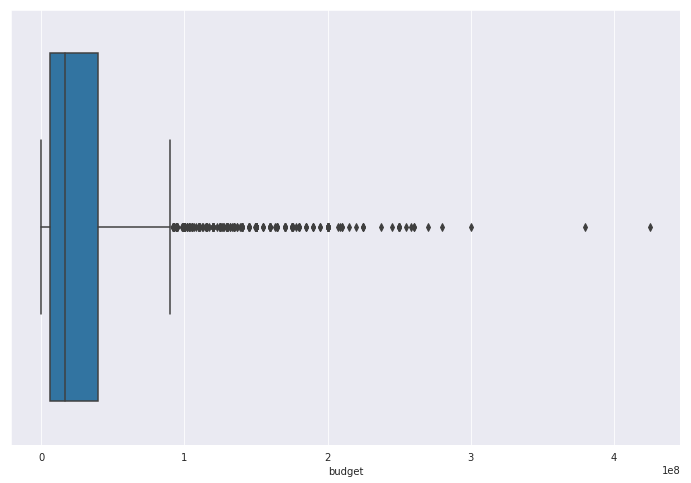

In [20]:
plt.figure(figsize=(12, 8))
_ = sns.boxplot(movies[movies.budget>1]['budget'])

In [21]:
np.log1p(movies.revenue).describe()

count    10866.000000
mean         7.472882
std          8.507716
min          0.000000
25%          0.000000
50%          0.000000
75%         16.993564
max         21.746258
Name: revenue, dtype: float64

In [22]:
np.log1p(movies.revenue).describe()

count    10866.000000
mean         7.472882
std          8.507716
min          0.000000
25%          0.000000
50%          0.000000
75%         16.993564
max         21.746258
Name: revenue, dtype: float64

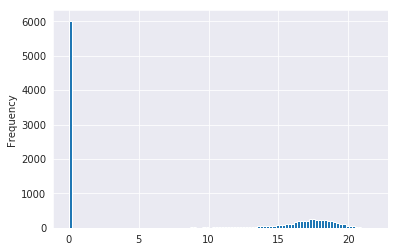

In [23]:
np.log1p(movies.revenue).plot.hist(bins=100)

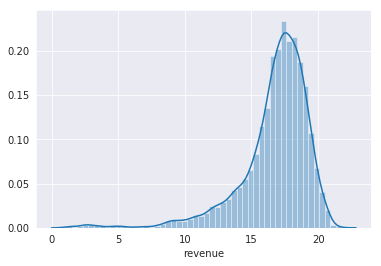

In [24]:
_ = sns.distplot(np.log1p(movies[movies['revenue']>0]['revenue']), bins=50)

In [25]:
movies.release_year.value_counts().sort_index()

1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    490
2011    540
2012    588
2013    659
2014    700
2015    629
Name: release_year, dtype: int64

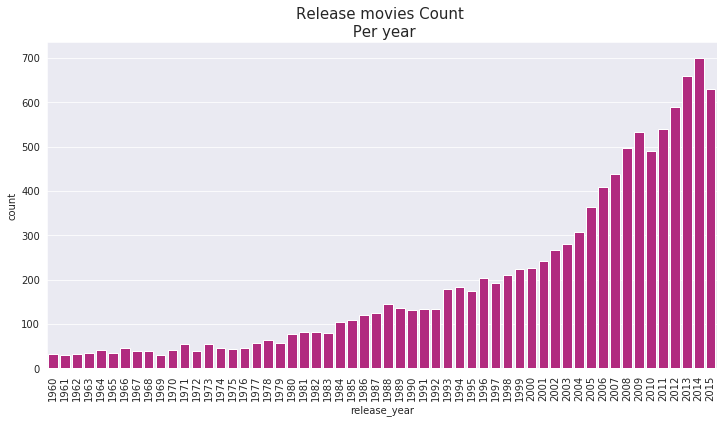

In [37]:
plt.figure(figsize=(12, 6))
_ = sns.countplot(x='release_year', data=movies, color='mediumvioletred')
_ = plt.xticks(rotation=90, fontsize = 10)
_ = plt.title('Release movies Count \n Per year', fontsize=15)